<a href="https://colab.research.google.com/github/willbueno/VWCO-Curso-IA/blob/main/Redes%20Neurais%20e%20Deep%20Learning/Roteiro02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Roteiro Redes Neurais e Deep Learning**
## Utilizar este Notebook para executar os comandos.
**Arquivo de referência:** *Roteiro Redes Neurais e Deep Learning.docx*

In [2]:
import torch
import keras
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, MaxPool2D, Conv2D, GlobalMaxPool2D, Flatten, Dropout
from keras import ops, layers

from tensorflow.keras.datasets import mnist

In [17]:
model = Sequential(
    [
      Input(shape=(784,)),
      Dense(4, activation='relu', name='intermediary'),
      Dense(2)
    ]
)

In [9]:
model1 = Sequential()
model1.add(Dense(4, activation='relu'))
model1.add(Dense(2))

In [20]:
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ intermediary (Dense)            │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,150 (12.30 KB)

 Trainable params: 3,150 (12.30 KB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
print(model1.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
x = ops.ones((1,4))

In [23]:
print(x)

tf.Tensor([[1. 1. 1. 1.]], shape=(1, 4), dtype=float32)


In [24]:
model.weights

[<Variable path=sequential_5/intermediary/kernel, shape=(784, 4), dtype=float32, value=[[-0.00650539  0.04160549 -0.05186562  0.0250304 ]
  [ 0.02592427 -0.05027929 -0.02856204  0.06512664]
  [ 0.03344937  0.00248931  0.06855963  0.04046346]
  ...
  [ 0.07034922  0.08016361  0.06293672 -0.0094815 ]
  [ 0.05026793  0.04389328 -0.05915356 -0.0056727 ]
  [-0.0393408   0.06990598 -0.00995237 -0.06350926]]>,
 <Variable path=sequential_5/intermediary/bias, shape=(4,), dtype=float32, value=[0. 0. 0. 0.]>,
 <Variable path=sequential_5/dense_4/kernel, shape=(4, 2), dtype=float32, value=[[-0.0854342   0.48665643]
  [-0.5813961  -0.5722456 ]
  [-0.25462747  0.7122822 ]
  [-0.00521159 -0.35671568]]>,
 <Variable path=sequential_5/dense_4/bias, shape=(2,), dtype=float32, value=[0. 0.]>]

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
x_train = x_train/255
x_test = x_test/255

In [8]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'],
)

In [12]:
processo = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.9088 - loss: 0.3074
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9828 - loss: 0.0548
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9902 - loss: 0.0324
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9945 - loss: 0.0194
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9953 - loss: 0.0155
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9961 - loss: 0.0115
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9982 - loss: 0.0058
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9983 - loss: 0.0051
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9987 - loss: 0.0048
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9985 - loss: 0.0045


In [14]:
import matplotlib.pyplot as plt

In [19]:
model.evaluate(x_test, y_test)
model.predict(x_test[:1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9835 - loss: 0.0646
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[1.0910240e-14, 1.5105484e-13, 2.2216588e-11, 8.4067912e-11,
        1.9180955e-15, 1.6413656e-16, 4.2112708e-20, 1.0000000e+00,
        1.4286761e-12, 1.7962293e-11]], dtype=float32)

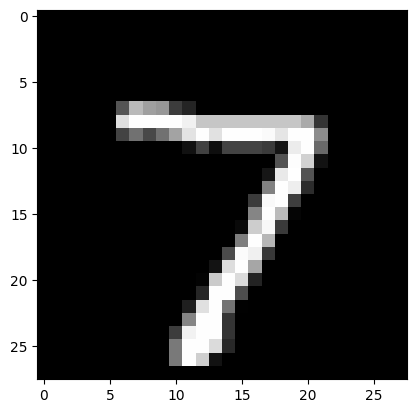

In [31]:
plt.imshow(x_test[0], cmap='gray')